# Airbnb 2017 Data for Boston and Seattle 

Airbnb, Inc., based in San Francisco, California, operates an online marketplace focused on short-term homestays and experiences. The company acts as a broker and charges a commission from each booking.

We have Airbnb data for 2017 for Boston and Seattle cities. Data can be found at "http://insideairbnb.com/get-the-data/" . Data gives us information about properties listings,avaliablity calander and people's reviews for the properties.

I will be trying to find answers of questions using Airbnb 2017 data:

#### Q1 What is the best time to Visit Seattle and Boston? How much price spikes on average ?

#### Q2 Is there a general upward trend of new Airbnb listings for Boston and Seattle ?

#### Q3 Is there a general upward trend of total Airbnb visitors to Boston and Seattle ?


In [95]:
## Importing Python Packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings

warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',None)


In [96]:
## Reading Boston City related data

Boston_Listings = pd.read_csv("C:\\Users\\A04248\\Desktop\\Boston\\listings.csv")
Boston_Calender = pd.read_csv("C:\\Users\\A04248\\Desktop\\Boston\\calendar.csv")
Boston_Reviews =  pd.read_csv("C:\\Users\\A04248\\Desktop\\Boston\\reviews.csv")


In [97]:
Boston_Listings.sample(5)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
2414,8163273,https://www.airbnb.com/rooms/8163273,20160906204935,2016-09-07,2br Lux Apt. in Boston Fenway,This apartment is complete with a fully equipp...,NaN,This apartment is complete with a fully equipp...,none,Residents will find themselves right in the he...,NaN,"These newly constructed, luxury apartments epi...",NaN,NaN,NaN,https://a2.muscache.com/im/pictures/10127fcb-8...,https://a2.muscache.com/im/pictures/10127fcb-8...,https://a2.muscache.com/im/pictures/10127fcb-8...,https://a2.muscache.com/im/pictures/10127fcb-8...,30283594,https://www.airbnb.com/users/show/30283594,Kara,2015-03-30,US,NaN,within a few hours,98%,55%,f,https://a2.muscache.com/im/users/30283594/prof...,https://a2.muscache.com/im/users/30283594/prof...,Fenway/Kenmore,749,749,"['email', 'phone', 'reviews', 'jumio']",t,t,"Boylston Street, Boston, MA 02215, United States",Fenway/Kenmore,Fenway,NaN,Boston,MA,02215,Boston,"Boston, MA",US,United States,42.344756,-71.100621,t,Apartment,Entire home/apt,5,2.0,2.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$319.00,NaN,"$9,145.00",NaN,$100.00,1,$0.00,3,1125,today,NaN,0,5,35,125,2016-09-06,1,2016-07-23,2016-07-23,60.0,10.0,8.0,10.0,10.0,10.0,4.0,f,NaN,NaN,f,strict,f,f,136,0.64
2474,10552485,https://www.airbnb.com/rooms/10552485,20160906204935,2016-09-07,Cozy Two bedroom apartment,"Great location, above a subway stop. Walking d...",NaN,"Great location, above a subway stop. Walking d...",none,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://a2.muscache.com/im/pictures/307f372b-e...,NaN,41720242,https://www.airbnb.com/users/show/41720242,Irv,2015-08-17,Singapore,NaN,within a few hours,90%,100%,f,https://a0.muscache.com/im/users/41720242/prof...,https://a0.muscache.com/im/users/41720242/prof...,NaN,3,3,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,"Commonwealth Avenue, Boston, MA 02215, United ...",NaN,Fenway,NaN,Boston,MA,02215,Boston,"Boston, MA",US,United States,42.349185,-71.095668,f,Apartment,Entire home/apt,4,2.0,2.0,2.0,Real Bed,"{TV,Internet,""Wireless Internet"",""Air Conditio...",NaN,$260.00,NaN,NaN,NaN,NaN,1,$0.00,1,1125,5 weeks ago,NaN,0,0,0,248,2016-09-06,9,2016-02-22,2016-05-19,80.0,8.0,5.0,8.0,10.0,10.0,8.0,f,NaN,NaN,f,flexible,f,f,2,1.36
2484,3589267,https://www.airbnb.com/rooms/3589267,20160906204935,2016-09-07,There's No Place Like {Our} Home,Hi! We will update availability for upcoming m...,UPDATE: 17 Sept (how did that happen?!) : So m...,Hi! We will update availability for upcoming m...,none,You mean you don't know? It's only the best st...,Sometimes people smoke here. You w

In [98]:
Boston_Calender.sample(5)

,listing_id,date,available,price
745221,13216268,2016-10-29,f,NaN
233273,14461498,2017-07-12,t,$125.00
1239183,13381254,2017-08-28,f,NaN
411617,6134013,2016-12-17,f,NaN
1285036,14572086,2016-10-29,t,$150.00


In [99]:
Boston_Reviews.sample(5)

,listing_id,id,date,reviewer_id,reviewer_name,comments
24736,2043541,61698315,2016-02-07,3740942,Stephen,We had a good overall experience staying at 16...
19173,11306586,73914243,2016-05-11,25892201,Sara,Alan and Eddie were great hosts. We had a nice...
55116,8782991,73253132,2016-05-07,9200712,Katrin,"Didn't meet Ali in person, but he always answe..."
42463,8495348,52013369,2015-10-25,24982799,Jason,Cool guy. Big room. Close to the city.
34107,11418599,92505623,2016-08-08,13762142,Martin,"Shawna was a Great, friendly and helpful host!..."


In [100]:
print('Boston_Listings Shape', Boston_Listings.shape,'\n')
print('Boston_Calender Shape', Boston_Calender.shape,'\n')
print('Boston_Reviews Shape',  Boston_Reviews.shape,'\n')

#print(Boston_Listings.columns)

Boston_Listings Shape (3585, 95) 

Boston_Calender Shape (1308890, 4) 

Boston_Reviews Shape (68275, 6) 



In [101]:
## Reading Seattle City related data

Seattle_Listings = pd.read_csv("C:\\Users\\A04248\\Desktop\\Seattle\\listings.csv")
Seattle_Calender = pd.read_csv("C:\\Users\\A04248\\Desktop\\Seattle\\calendar.csv")
Seattle_Reviews = pd.read_csv("C:\\Users\\A04248\\Desktop\\Seattle\\reviews.csv")


In [102]:
Seattle_Listings.sample(5)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
3300,1488166,https://www.airbnb.com/rooms/1488166,20160104002432,2016-01-04,Entire Home - Beautiful Sunset Hill,"Immaculate, light-filled home in Sunset Hill w...",_______________________ BEDROOMS AND BATHS: 3 ...,"Immaculate, light-filled home in Sunset Hill w...",none,_____________________ NEIGHBORHOOD INFO: _____...,NaN,Ample free street parking available. One block...,NaN,NaN,https://a1.muscache.com/ac/pictures/21962728/1...,NaN,1212520,https://www.airbnb.com/users/show/1212520,Jeremy And Rachael,2011-09-26,"Seattle, Washington, United States",Newlyweds and new parents who love each other ...,within an hour,100%,100%,f,https://a0.muscache.com/ac/users/1212520/profi...,https://a0.muscache.com/ac/users/1212520/profi...,Ballard,4.0,4.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"34th Avenue Northwest, Seattle, WA 98117, Unit...",Ballard,Sunset Hill,Ballard,Seattle,WA,98117,Seattle,"Seattle, WA",US,United States,47.676984,-122.401496,t,House,Entire home/apt,6,2.0,3.0,4.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",NaN,$475.00,NaN,NaN,"$1,000.00",$175.00,6,$50.00,4,365,6 weeks ago,t,30,60,90,365,2016-01-04,19,2013-08-12,2015-12-01,97.0,10.0,10.0,10.0,10.0,10.0,9.0,f,NaN,WASHINGTON,f,strict,f,f,3,0.65
2967,2727938,https://www.airbnb.com/rooms/2727938,20160104002432,2016-01-04,Studio Apartment Seattle,"Charming, cozy mid century studio apartment. C...",NaN,"Charming, cozy mid century studio apartment. C...",none,NaN,NaN,NaN,https://a0.muscache.com/ac/pictures/35580265/f...,https://a0.muscache.com/im/pictures/35580265/f...,https://a0.muscache.com/ac/pictures/35580265/f...,https://a0.muscache.com/ac/pictures/35580265/f...,13574164,https://www.airbnb.com/users/show/13574164,Jessica,2014-03-26,"Seattle, Washington, United States",NaN,NaN,NaN,NaN,f,https://a0.muscache.com/ac/users/13574164/prof...,https://a0.muscache.com/ac/users/13574164/prof...,Capitol Hill,1.0,1.0,"['email', 'phone', 'google', 'reviews', 'kba']",t,t,"East Harrison Street, Seattle, WA 98102, Unite...",Capitol Hill,Broadway,Capitol Hill,Seattle,WA,98102,Seattle,"Seattle, WA",US,United States,47.622133,-122.328307,t,Apartment,Entire home/apt,2,1.0,0.0,1.0,Real Bed,"{Internet,""Wireless Internet"",Kitchen,""Elevato...",NaN,$110.00,NaN,NaN,NaN,$20.00,1,$0.00,2,1125,2 weeks ago,t,12,24,42,79,2016-01-04,15,2014-04-21,2015-07-05,97.0,10.0,9.0,10.0,10.0,10.0,9.0,f,NaN,WASHINGTON,f,moderate,f,f,1,0.72
1631,2825852,https://www.airbnb.com/rooms/2825852,20160104002432,2016-01-04,99 Amazing View Downtown,Calendar Pricing Amazing 1Bed apartment on a ...,See 2Bed version w/ same views: 

In [103]:
Seattle_Calender.sample(5)

,listing_id,date,available,price
1322750,8670484,2016-12-24,t,$30.00
951394,6870575,2016-07-26,t,$176.00
1388667,7178490,2016-07-29,t,$155.00
980774,6545246,2016-01-23,t,$55.00
636519,9521903,2016-11-23,t,$124.00


In [104]:
Seattle_Reviews.sample(5)

,listing_id,id,date,reviewer_id,reviewer_name,comments
48710,580182,29683520,2015-04-11,29320899,Wendy,We had a great three days in Jasen's house. He...
73206,1856970,12797514,2014-05-11,2036533,Eric,I just stayed with Carol for a few days in Sea...
52590,7809595,54261855,2015-11-17,46763052,Bryan,Great location in walking distance of great fo...
12464,654734,6623465,2013-08-19,7446433,Pierce,Grace was great and greeted me when I arrived....
70679,1003890,36271700,2015-06-27,532925,Kok Huat,Had a great stay at Rob's house. Rob was helpf...


In [105]:
print('Seattle_Listings Shape', Seattle_Listings.shape)
print('Seattle_Calender Shape', Seattle_Calender.shape)
print('Seattle_Reviews Shape',  Seattle_Reviews.shape)

#print(Seattle_Listings.columns)

Seattle_Listings Shape (3818, 92)
Seattle_Calender Shape (1393570, 4)
Seattle_Reviews Shape (84849, 6)


## Q1 What is the best time to Visit  Boston  and Seattle ?

### Boston Data

In [106]:
## Calender Date Range for Boston
## So we have 1 Full year Data

print('Boston Calender Starting Date', Boston_Calender['date'].min())
print('Boston Calender Ending Date',   Boston_Calender['date'].max())

Boston Calender Starting Date 2016-09-06
Boston Calender Ending Date 2017-09-05


In [107]:
# Column 'price' has around 50% null values

Boston_Calender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1308890 non-null  int64 
 1   date        1308890 non-null  object
 2   available   1308890 non-null  object
 3   price       643037 non-null   object
dtypes: int64(1), object(3)
memory usage: 39.9+ MB


In [108]:
#Dropping the rows where price has Nan values. Since nan values are around 50%, amputing them may introduce bias

Boston_Calender = Boston_Calender.dropna(subset = ['price'],how = 'any')
Boston_Calender.isnull().sum()

listing_id    0
date          0
available     0
price         0
dtype: int64

In [109]:
# Removing $ and , from Price column's values

Boston_Calender['price'] = Boston_Calender['price'].str.replace('$','').str.replace(',','')


In [110]:
#Changing datatype for date column from object to datetime so that we can perform datetime operation
#Changing datatype for price column from object to float so that we can perform mathematical operation


Boston_Calender['date'] = pd.to_datetime(Boston_Calender['date'])
Boston_Calender['price'] = Boston_Calender['price'].astype(float)


<AxesSubplot:ylabel='price'>

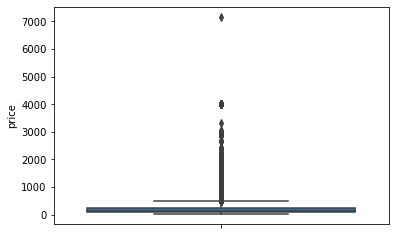

In [111]:
#Price column can have outliers. Checking for outliers

sns.boxplot(y = Boston_Calender['price'])

In [112]:

def Outlier_Treatment(data):
    
    Q1 = np.percentile(data,25)
    Q3= np.percentile(data,75) 
    IQR = Q3-Q1
    
    Upper_IQR_bound = (Q3)+(1.5*IQR) 
    Lower_IQR_bound = (Q1)-(1.5*IQR)
    
    data = np.where(data>Upper_IQR_bound,Upper_IQR_bound,data) 
    data = np.where(data<Lower_IQR_bound,Lower_IQR_bound,data)
    
    return data

<AxesSubplot:ylabel='price'>

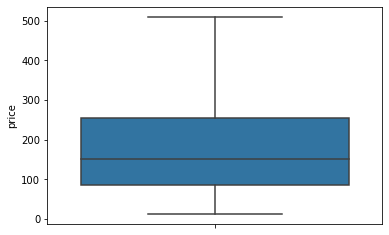

In [113]:
#Boston_Calender['price'] = Outlier_Treatment(Boston_Calender['price'],.96)
Boston_Calender['price'] = Outlier_Treatment(Boston_Calender['price'])
sns.boxplot(y = Boston_Calender['price'])

In [114]:
Boston_Calender['price'].describe()

count    643037.000000
mean        189.031208
std         126.205048
min          11.000000
25%          85.000000
50%         150.000000
75%         255.000000
max         510.000000
Name: price, dtype: float64

In [115]:
## Adding a new column 'Month' and Week as we are check what is best month for visting Boston

Boston_Calender['Month'] = Boston_Calender['date'].dt.month_name()
Boston_Calender['Week_Number'] = Boston_Calender['date'].dt.isocalendar().week
Boston_Calender = Boston_Calender.sort_values(by = ['Week_Number']).reset_index()
Boston_Calender

,index,listing_id,date,available,price,Month,Week_Number
0,1056191,57156,2017-01-02,t,95.0,January,1
1,922575,11760822,2017-01-02,t,130.0,January,1
2,862741,8428314,2017-01-02,t,199.0,January,1
3,1227737,14251839,2017-01-06,t,99.0,January,1
4,1227738,14251839,2017-01-05,t,79.0,January,1
...,...,...,...,...,...,...,...
643032,64115,4149974,2016-12-31,t,103.0,December,52
643033,64114,4149974,2017-01-01,t,103.0,January,52
643034,63757,3730447,2017-01-01,t,180.0,January,52
643035,173918,10328539,2016-12-30,t,100.0,December,52


<AxesSubplot:xlabel='Month'>

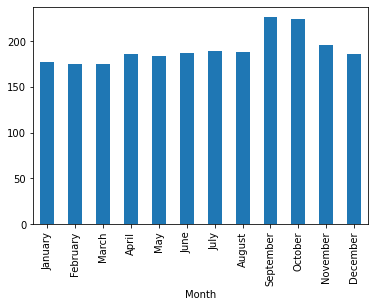

In [116]:
## Boston Bar Graph for prices for different months

Boston_Calender.groupby(['Month'],sort = False)['price'].mean().plot(kind = 'bar')

### Seattle Data 

In [117]:
## Calender Date Range for Seattle
## So we have 1 Full year Data

print('Seattle Calender Starting Date', Seattle_Calender['date'].min())
print('Seattle Calender Ending Date',   Seattle_Calender['date'].max())

Seattle Calender Starting Date 2016-01-04
Seattle Calender Ending Date 2017-01-02


In [118]:
# Column 'price' has around 25% null values

Seattle_Calender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [119]:
#Dropping the rows where price has Nan values. 

Seattle_Calender = Seattle_Calender.dropna(subset = ['price'],how = 'any')
Seattle_Calender.isnull().sum()

listing_id    0
date          0
available     0
price         0
dtype: int64

In [120]:
# Removing $ and , from Price column's values

Seattle_Calender['price'] = Seattle_Calender['price'].str.replace('$','').str.replace(',','')

In [121]:
#Changing datatype for date column from object to datetime so that we can perform datetime operation
#Changing datatype for price column from object to float so that we can perform mathematical operation


Seattle_Calender['date'] = pd.to_datetime(Seattle_Calender['date'])
Seattle_Calender['price'] = Seattle_Calender['price'].astype(float)


<AxesSubplot:ylabel='price'>

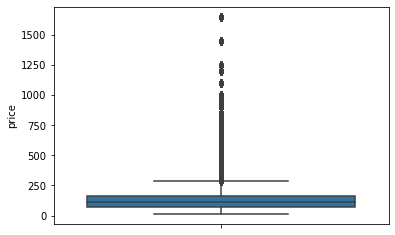

In [122]:
#Price column can have outliers. Checking for outliers

sns.boxplot(y = Seattle_Calender['price'])



<AxesSubplot:ylabel='price'>

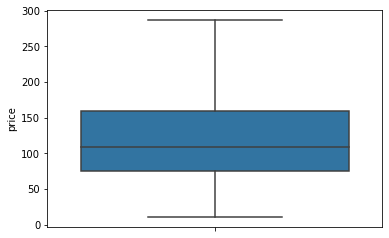

In [123]:
Seattle_Calender['price'] = Outlier_Treatment(Seattle_Calender['price'])
sns.boxplot(y = Seattle_Calender['price'])


In [124]:
Seattle_Calender['price'].describe()

count    934542.000000
mean        128.110183
std          70.429741
min          10.000000
25%          75.000000
50%         109.000000
75%         160.000000
max         287.500000
Name: price, dtype: float64

In [125]:
## Adding a new column 'Month' and Week as we are check what is best month for visting Seattle

Seattle_Calender['Month'] = Seattle_Calender['date'].dt.month_name()
Seattle_Calender['Week_Number'] = Seattle_Calender['date'].dt.isocalendar().week
Seattle_Calender = Seattle_Calender.sort_values(by = ['Week_Number']).reset_index()
Seattle_Calender

,index,listing_id,date,available,price,Month,Week_Number
0,0,241032,2016-01-04,t,85.0,January,1
1,25185,10234558,2016-01-04,t,50.0,January,1
2,25184,7618605,2017-01-02,t,175.0,January,1
3,633639,353347,2017-01-02,t,200.0,January,1
4,633640,838764,2016-01-04,t,240.0,January,1
...,...,...,...,...,...,...,...
934537,769053,6416765,2017-01-01,t,149.0,January,52
934538,769412,5056580,2016-12-26,t,99.0,December,52
934539,769413,5056580,2016-12-27,t,99.0,December,52
934540,767957,10020221,2016-12-31,t,55.0,December,52


<AxesSubplot:xlabel='Month'>

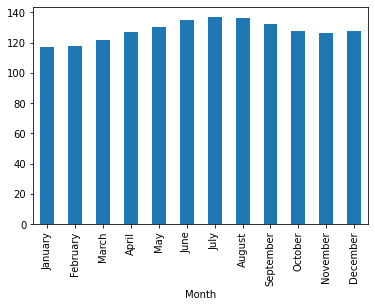

In [126]:
## Seattle Bar Graph for prices for different months

Seattle_Calender.groupby(['Month'],sort = False)['price'].mean().plot(kind = 'bar')

<AxesSubplot:xlabel='Month'>

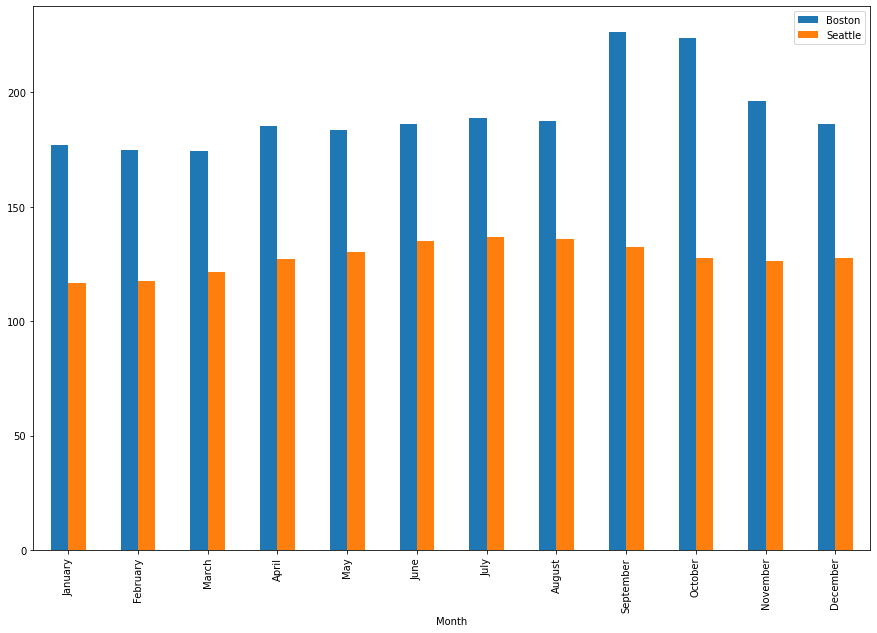

In [127]:
## Combing Boston and Seattle Data to show the comparsion of prices for Boston and Seattle

Boston_df = Boston_Calender.groupby(['Month'],sort = False,as_index=False)['price'].mean()
Seattle_df = Seattle_Calender.groupby(['Month'],sort = False,as_index = False)['price'].mean()

df = pd.merge(Boston_df, Seattle_df,on = 'Month')

df = df.rename(columns = {'price_x':'Boston','price_y':'Seattle'})


df.plot(kind = 'bar',x = 'Month',figsize = [15,10])




In [128]:
df['Diff_Prices'] = ((df['Boston'] - df['Seattle'])/df['Boston']*100)
df['Diff_Prices'] = df['Diff_Prices'].round(2)

df.style.bar(subset = ['Diff_Prices'],align = 'mid',color=['#d65f5f', '#5fba7d'])

,Month,Boston,Seattle,Diff_Prices
0,January,177.115636,116.902790,34.000000
1,February,174.638391,117.743205,32.580000
2,March,174.401406,121.689854,30.220000
3,April,185.347651,127.126945,31.410000
4,May,183.537500,130.273462,29.020000
5,June,186.397262,134.875110,27.640000
6,July,188.772502,136.950176,27.450000
7,August,187.528734,136.116894,27.420000
8,September,226.264387,132.621683,41.390000
9,October,223.906398,127.693157,42.970000


Boston_Price_Hike 22.33207822142115


<AxesSubplot:>

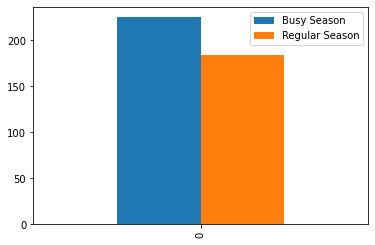

In [141]:
## Boston price hike for busy and regular season

Boston_Busy_Season_Price = df['Boston'][df['Boston']>200].mean() 
Boston_Reg_Season_Price = df['Boston'][df['Boston']<200].mean()
Boston_Price_Hike = (Boston_Busy_Season_Price - Boston_Reg_Season_Price)/Boston_Reg_Season_Price*100
print('Boston_Price_Hike',Boston_Price_Hike)

Boston_Season_Diff = pd.DataFrame({'Busy Season' : [Boston_Busy_Season_Price],'Regular Season':[Boston_Reg_Season_Price]})
Boston_Season_Diff.plot(kind = 'bar')



Seattle_Price_Hike 8.542621085423113


<AxesSubplot:>

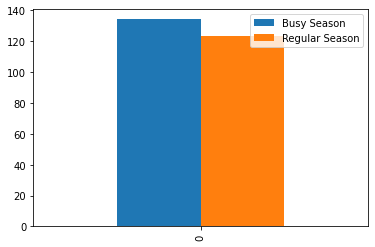

In [142]:
## Seattle price hike for busy and regular season

Seattle_Busy_Season_Price = df['Seattle'][df['Seattle']>130].mean() 
Seattle_Reg_Season_Price = df['Seattle'][df['Seattle']<130].mean()
Seattle_Price_Hike = (Seattle_Busy_Season_Price - Seattle_Reg_Season_Price)/Seattle_Reg_Season_Price*100
print('Seattle_Price_Hike',Seattle_Price_Hike)

Seattle_Season_Diff = pd.DataFrame({'Busy Season':[Seattle_Busy_Season_Price],'Regular Season':[Seattle_Reg_Season_Price]})
Seattle_Season_Diff.plot(kind ='bar')


### Is there a general upward trend of new Airbnb listings for Boston and Seattle ?


In [129]:
Boston_Listings['host_since'].info()
Boston_Listings['host_since'] = pd.to_datetime(Boston_Listings['host_since'])
Boston_Listings['Hosting_Since_Year'] = Boston_Listings['host_since'].dt.year


<class 'pandas.core.series.Series'>
RangeIndex: 3585 entries, 0 to 3584
Series name: host_since
Non-Null Count  Dtype 
--------------  ----- 
3585 non-null   object
dtypes: object(1)
memory usage: 28.1+ KB


<AxesSubplot:xlabel='Hosting_Since_Year'>

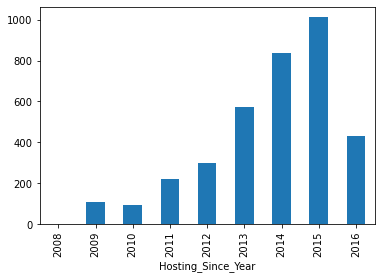

In [130]:
## Boston Listing Bar Garph

Boston_Listings.groupby('Hosting_Since_Year')['id'].count().plot(kind= 'bar')

In [131]:
Seattle_Listings['host_since'].info()
Seattle_Listings['host_since'] = pd.to_datetime(Seattle_Listings['host_since'])
Seattle_Listings['Hosting_Since_Year'] = Seattle_Listings['host_since'].dt.year


<class 'pandas.core.series.Series'>
RangeIndex: 3818 entries, 0 to 3817
Series name: host_since
Non-Null Count  Dtype 
--------------  ----- 
3816 non-null   object
dtypes: object(1)
memory usage: 30.0+ KB


<AxesSubplot:xlabel='Hosting_Since_Year'>

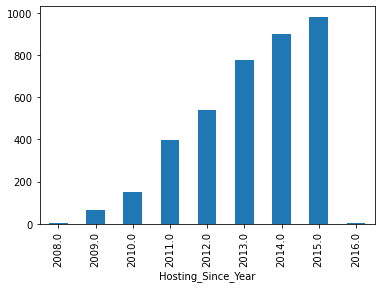

In [132]:
## Seattle Listing Bar Garph

Seattle_Listings.groupby('Hosting_Since_Year')['id'].count().plot(kind= 'bar')

### Q3 Is there a general upward trend of total Airbnb visitors to Boston and Seattle ?

Please note that in data, we don't have direct columns for vistors count. So i have used count of reviewers as an indirect way 
of getting the eastimate for visitors's trend for both Boston an Seattle

In [133]:
# Visitors Data For Boston

Boston_Reviews['date'] = pd.to_datetime(Boston_Reviews['date'])
print(Boston_Reviews['date'].info())
print('Min Review Date',Boston_Reviews['date'].min())
print('Max Review Date',Boston_Reviews['date'].max())



<class 'pandas.core.series.Series'>
RangeIndex: 68275 entries, 0 to 68274
Series name: date
Non-Null Count  Dtype         
--------------  -----         
68275 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 533.5 KB
None
Min Review Date 2009-03-21 00:00:00
Max Review Date 2016-09-06 00:00:00


In [134]:
Boston_Reviews['Year'] = Boston_Reviews['date'].dt.year
Boston_Reviews

,listing_id,id,date,reviewer_id,reviewer_name,comments,Year
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...,2013
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...,2013
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...,2013
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...,2013
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...,2013
...,...,...,...,...,...,...,...
68270,7462268,80537457,2016-06-18,22034145,Antonio,Joe y su mujer son encantadores. La habitación...,2016
68271,7462268,83640094,2016-07-03,40052513,Steve,Joe was on his way to Jamaica to be married! o...,2016
68272,7462268,85797088,2016-07-13,77129134,Nick,The room was very clean as were the bathrooms ...,2016
68273,7462268,97264637,2016-08-26,15799803,Vid,Staying in Lower Allston at Joe and Nancy's pl...,2016


<AxesSubplot:xlabel='Year'>

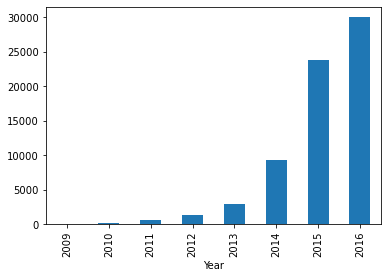

In [135]:
## Boston Visitors Bar Chart

Boston_Reviews.groupby(['Year'])['reviewer_id'].count().plot(kind = 'bar')

<AxesSubplot:xlabel='Year'>

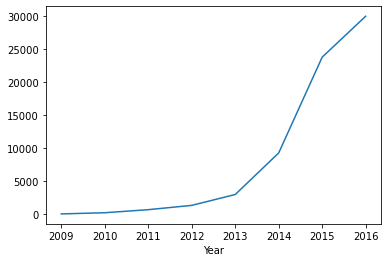

In [136]:
## Boston Visitors line Chart

Boston_Reviews.groupby(['Year'])['reviewer_id'].count().plot()

In [137]:

# Visitors Data For Seattle

Seattle_Reviews['date'] = pd.to_datetime(Seattle_Reviews['date'])
print(Seattle_Reviews['date'].info())
print('Min Review Date',Seattle_Reviews['date'].min())
print('Max Review Date',Seattle_Reviews['date'].max())


<class 'pandas.core.series.Series'>
RangeIndex: 84849 entries, 0 to 84848
Series name: date
Non-Null Count  Dtype         
--------------  -----         
84849 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 663.0 KB
None
Min Review Date 2009-06-07 00:00:00
Max Review Date 2016-01-03 00:00:00


In [138]:
Seattle_Reviews['Year'] = Seattle_Reviews['date'].dt.year
Seattle_Reviews

,listing_id,id,date,reviewer_id,reviewer_name,comments,Year
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...,2015
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...,2015
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb...",2015
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...,2015
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...,2015
...,...,...,...,...,...,...,...
84844,3624990,50436321,2015-10-12,37419458,Ryan,The description and pictures of the apartment ...,2015
84845,3624990,51024875,2015-10-17,6933252,Linda,We had an excellent stay. It was clean and com...,2015
84846,3624990,51511988,2015-10-20,19543701,Jaime,"Gran ubicación, cerca de todo lo atractivo del...",2015
84847,3624990,52814482,2015-11-02,24445024,Jørgen,"Very good apartement, clean and well sized. Si...",2015


<AxesSubplot:xlabel='Year'>

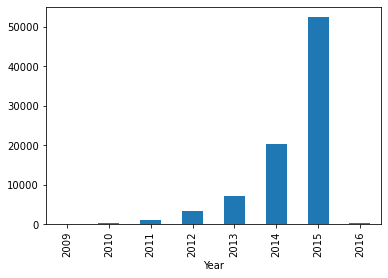

In [139]:
## Seattle Visitors Bar Chart

Seattle_Reviews.groupby(['Year'])['reviewer_id'].count().plot(kind = 'bar')

<AxesSubplot:xlabel='Year'>

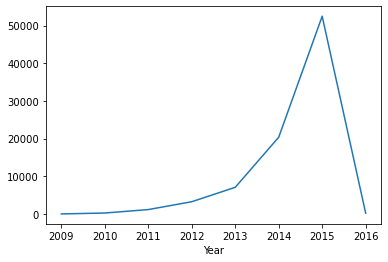

In [140]:
## Seattle Visitors line Chart

Seattle_Reviews.groupby(['Year'])['reviewer_id'].count().plot()